Welcome to aurora-asi-lib. This introductary notebook guides you though some of the aurora-asi-lib (imported as asilib) functionality.

In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import asilib

First of all, you should know where the data and movies are saved to. This information is in `asilib.config` and can be changed with `python3 -m asilib config` to configure asilib.

In [5]:
asilib.config

{'ASILIB_DIR': PosixPath('/home/mike/research/aurora-asi-lib/asilib'),
 'ASI_DATA_DIR': PosixPath('/home/mike/asilib-data'),
 'IRBEM_WARNING': True}

As you can guess, `asilib.config['ASILIB_DIR']` is the directory where this code resides, `asilib.config['ASI_DATA_DIR']` is the directory where the data is saved to.

# Plot and analize one image (frame)

This program plots a bright auroral arc that was analyzed by Imajo et al., 2021 "Active auroral arc powered by accelerated electrons from very high altitudes"

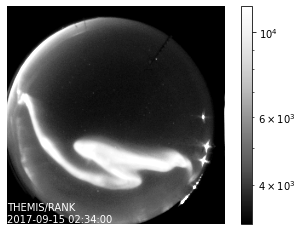

In [11]:
frame_time, frame, ax, im = asilib.plot_frame(datetime(2017, 9, 15, 2, 34, 0), 'THEMIS', 'RANK', 
                    color_norm='log', color_map='auto')
plt.colorbar(im)
ax.axis('off');

Notice that you did not need to explicitly download or load the data---`asilib` takes care of that for you. 

Now what if you need to analyze the image? `asilib.plot_frame` returns the time stamp of the frame `frame_time` and the 2-d image np.array `frame`.

In [10]:
frame_time, frame

(datetime.datetime(2017, 9, 15, 2, 34, 0, 42000),
 array([[2777, 2739, 2757, ..., 2780, 2756, 2759],
        [2780, 2782, 2807, ..., 2779, 2745, 2765],
        [2752, 2779, 2767, ..., 2776, 2723, 2781],
        ...,
        [2747, 2748, 2770, ..., 2749, 2738, 2762],
        [2759, 2772, 2767, ..., 2739, 2758, 2769],
        [2762, 2756, 2744, ..., 2753, 2742, 2736]], dtype=uint16))

You can also just load the data using `asilib.get_frame()`. We will use this to get a slice of pixels through zenith.

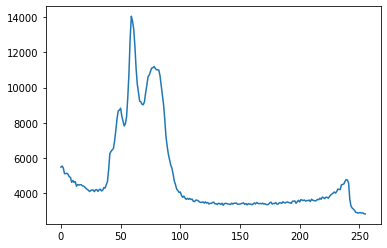

In [21]:
frame_time, frame = asilib.get_frame(datetime(2017, 9, 15, 2, 34, 0), 'THEMIS', 'RANK', force_download=False)
plt.plot(frame[:, frame.shape[0]//2])  # don't forget that array rows correspond to latitude pixels

Now lets add the intensity mapped to the assumed emission altitude. To do this we use RANK's calibration. We will use the calibration's `FULL_MAP_LATITUDE` array to map the pixels.

In [24]:
cal = asilib.load_cal('THEMIS', 'RANK')
cal.keys()

dict_keys(['IMAGER_UID', 'IMAGER_UNIX_TIME', 'SITE_UID', 'SITE_UNIX_TIME', 'SITE_MAP_LATITUDE', 'SITE_MAP_LONGITUDE', 'SITE_MAP_ALTITUDE', 'FULL_ROW', 'FULL_COLUMN', 'FULL_IGNORE', 'FULL_SUBTRACT', 'FULL_MULTIPLY', 'FULL_ELEVATION', 'FULL_AZIMUTH', 'FULL_MAP_ALTITUDE', 'FULL_MAP_LATITUDE', 'FULL_MAP_LONGITUDE', 'FULL_BIN', 'BIN_ROW', 'BIN_COLUMN', 'BIN_ELEVATION', 'BIN_AZIMUTH', 'BIN_MAP_ALTITUDE', 'BIN_MAP_LATITUDE', 'BIN_MAP_LONGITUDE', 'cal_path'])

In [34]:
cal['FULL_MAP_ALTITUDE'] # Meter units

array([ 90000., 110000., 150000.], dtype=float32)

In [29]:
# first dimention is the altitude referenced by cal['FULL_MAP_ALTITUDE']
cal['FULL_MAP_LATITUDE'][1, :, frame.shape[0]//2]

array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan, 73.84058 , 73.04196 , 72.30066 ,
       71.61681 , 70.98931 , 70.415985, 69.893875, 69.41951 , 68.98912 ,
       68.59884 , 68.24487 , 67.9236  , 67.63164 , 67.365875, 67.1235  ,
       66.90198 , 66.699066, 66.512764, 66.34129 , 66.183105, 66.03682 ,
       65.901215, 65.77523 , 65.65792 , 65.548454, 65.44608 , 65.35015 ,
       65.260086, 65.17537 , 65.09553 , 65.02016 , 64.94888 , 64.88138 ,
       64.81734 , 64.7565  , 64.698616, 64.64346 , 64.59085 , 64.540596,
       64.49253 , 64.4465  , 64.402374, 64.36002 , 64.31934 , 64.28021 ,
       64.24254 , 64.20624 , 64.17122 , 64.13741 , 64.10475 , 64.07316 ,
       64.04259 , 64.01297 , 63.984257, 63.956398, 63.929356, 63.90308 ,
       63.877537, 63.852684, 63.828487, 63.804916, 63.78194 , 63.75953 ,
       63.73766 , 63.7163  , 63.695435, 63.675034, 63.65508 , 63.63555 ,
       63.61643 , 63.597694, 63.579334, 63.561325, 

Text(0, 0.5, 'Intensity')

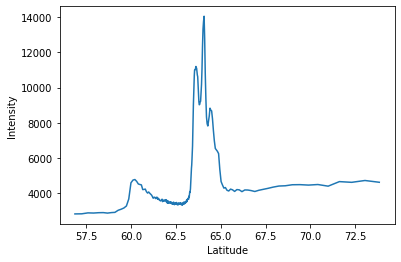

In [32]:
plt.plot(cal['FULL_MAP_LATITUDE'][1, :-1, frame.shape[0]//2], frame[:, frame.shape[0]//2])
plt.xlabel('Latitude'); plt.ylabel('Intensity')

# Keogram
A lot of the above functionality is contained in `asilib.keogram` and `asilib.plot_keogram` functions. For reference, `asilib.plot_keogram` internally calls `asilib.keogram`.

(<AxesSubplot:title={'center':'2017-09-15 | THEMIS-RANK keogram'}>,
 <matplotlib.collections.QuadMesh at 0x7f957a7f5690>)

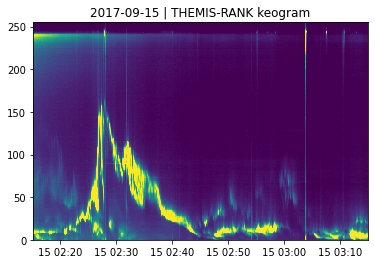

In [36]:
asilib.plot_keogram([datetime(2017, 9, 15, 2, 0, 0), datetime(2017, 9, 15, 3, 15, 0)], 'THEMIS', 'RANK');